In [1]:
# GOAL: HAVE EACH ANALYSIS SECTION COMPUTE A STANDARD SET OF CALCULATIONS FOR RISK METRICS AND CORRELATION

"""
For now, we keep it simple. If we need to expand, we can. 
We are taking what we need to in order to understand how each basket of currencies 
is correlated to the market proxy (bitcoin)
"""

'\nFor now, we keep it simple. If we need to expand, we can. \nWe are taking what we need to in order to understand how each basket of currencies \nis correlated to the market proxy (bitcoin)\n'

In [2]:
# STEP 1: IMPORT DEPENDENCIES
#For basic calculations:
import pandas as pd
import numpy as np
import csv
from pathlib import Path

#For Heatmap:
import seaborn as sns
%matplotlib inline

In [3]:
# STEP 2: IMPORT DATA AS DATAFRAME
"""
Determnine if we are reading csv data, running individual api calls, or querying an in-house database
"""
#reading in csv data
df_2016 = pd.read_csv(
    Path('2016_data.csv')
).set_index('Month')

In [4]:
# View the dataframe
df_2016.describe()

,price_open,price_close,volume_traded,price_open.1,price_close.1,volume_traded.1,price_open.2,price_close.2,volume_traded.2,price_open.3,price_close.3,volume_traded.3
count,12.000000,12.000000,12.000000,12.000000,12.000000,1.200000e+01,12.000000,12.000000,12.000000,12.000000,12.000000,12.000000
mean,545.707749,592.952083,37642.420569,2.610002,2.293654,1.661855e+05,3.484444,3.563126,28028.915298,29.013663,9.652208,597.223896
std,125.175914,165.586142,22198.815900,4.777452,4.199276,3.372492e+05,1.173220,1.180938,15529.118382,81.433081,22.888378,1547.872372
min,390.440000,395.950000,6812.981239,0.000000,0.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,429.659243,445.104500,26317.668117,0.000000,0.000000,0.000000e+00,3.344390,3.582937,19424.880097,0.000000,0.000000,0.000000
50%,552.522000,593.360000,38948.981270,0.000000,0.000000,0.000000e+00,3.824125,3.835510,30213.557915,0.000000,0.000000,0.000000
75%,635.695000,678.372750,43120.088937,2.137500,2.017500,7.571974e+04,3.941028,4.063218,34526.398095,0.000000,0.000000,0.000000
max,742.396000,967.450000,95787.851760,11.870000,10.900010,1.019536e+06,4.638000,4.556800,57597.788250,280.000000,67.207030,5157.258046


In [5]:
# Clean the dataframe to only include the closing price
final_2016_df = pd.DataFrame()
final_2016_df['BTC_Monthly_Close'] = df_2016['price_close']
final_2016_df['ETH_Monthly_Close'] = df_2016['price_close.1']
final_2016_df['LTC_Monthly_Close'] = df_2016['price_close.2']
final_2016_df['ZEC_Monthly_Close'] = df_2016['price_close.3']


final_2016_df

,BTC_Monthly_Close,ETH_Monthly_Close,LTC_Monthly_Close,ZEC_Monthly_Close
Month,,,,
January,395.950,0.00000,0.00000,0.00000
February,433.700,0.00000,3.37701,0.00000
March,416.100,0.00000,3.29989,0.00000
April,448.906,0.00000,3.69254,0.00000
May,531.190,0.00000,4.55680,0.00000
June,671.524,0.00000,4.16053,0.00000
July,622.570,0.00000,3.94000,0.00000
August,574.220,0.00000,3.65158,0.00000
September,612.500,0.00000,3.83373,0.00000


In [7]:
# STEP 3: CALCULATE Monthly RETURNS FOR EACH CURRENCY IN Designated Time range from  DATAFRAME, DROP NULL VALUES
"""

Will need: .pct_change().dropna(inplace = True)

"""
btc_2016_df = final_2016_df['BTC_Monthly_Close'].pct_change().fillna(0)
btc_2016_df

Month
January      0.000000
February     0.095340
March       -0.040581
April        0.078842
May          0.183299
June         0.264188
July        -0.072900
August      -0.077662
September    0.066664
October      0.141092
November     0.062206
December     0.303145
Name: BTC_Monthly_Close, dtype: float64

In [13]:
eth_2016_df = final_2016_df['ETH_Monthly_Close'].drop(
    labels=['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 'September']).pct_change().fillna(0)
eth_2016_df

Month
October     0.000000
November   -0.215245
December   -0.056564
Name: ETH_Monthly_Close, dtype: float64

In [11]:
ltc_2016_df = final_2016_df['LTC_Monthly_Close'].drop(
    labels=['January']).pct_change().fillna(0)
ltc_2016_df

Month
February     0.000000
March       -0.022837
April        0.118989
May          0.234056
June        -0.086962
July        -0.053005
August      -0.073203
September    0.049883
October      0.051399
November    -0.048003
December     0.140743
Name: LTC_Monthly_Close, dtype: float64

In [14]:
zec_2016_df = final_2016_df['ZEC_Monthly_Close'].drop(
    labels=['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 'September', 'October']).pct_change().fillna(0)
zec_2016_df

Month
November    0.000000
December   -0.276572
Name: ZEC_Monthly_Close, dtype: float64

In [16]:
# Step 4: Calculate the variance of bitcoin, in this case being used as a proxy for the market.
# assign to market variance value
market_var = btc_2016_df.var()
market_var

0.015260905697063825

In [21]:
btc_var = btc_2016_df.var()
btc_var

0.015260905697063825

In [17]:
eth_var = eth_2016_df.var()
eth_var

0.012451559951459221

In [18]:
ltc_var = ltc_2016_df.var()
ltc_var

0.01036394052673369

In [19]:
zec_var = zec_2016_df.var()
zec_var

0.0382459421716928

In [22]:
# STEP 5B: CALCULATE COVARIANCE OF EACH CURRENCY RELATIVE TO BITCOIN
"""
Use monthly returns of currency and monthly returns of bitcoin as market proxy

"""

# market_cov = final_2018_df['BTC_Monthly_Close'].cov(final_2018_df['BTC_Monthly_Close'])
# market_cov

mkt_2016_cov = btc_2016_df.cov(btc_2016_df)
mkt_2016_cov

0.015260905697063825

In [23]:
eth_2016_cov = eth_2016_df.cov(btc_2016_df)
eth_2016_cov

0.007674313269944223

In [24]:
ltc_2016_cov = ltc_2016_df.cov(btc_2016_df)
ltc_2016_cov

0.006166094182392248

In [25]:
zec_2016_cov = zec_2016_df.cov(btc_2016_df)
zec_2016_cov

-0.03331850893062422

In [32]:
# STEP 6: CALCULATE BETA OF EACH CURRENCY

"""
beta = covariance of asset to market / variance of market

use previous calculations for market variance and covariance of assets
"""
btc_beta_2016 = mkt_2016_cov / market_var
btc_beta_2016

1.0

In [28]:
eth_beta_2016 = eth_2016_cov / btc_var
eth_beta_2016

0.5028740379033172

In [29]:
ltc_beta_2016 = ltc_2016_cov / btc_var
ltc_beta_2016

0.40404510091288975

In [30]:
zec_beta_2016 = zec_2016_cov / btc_var
zec_beta_2016

-2.1832589488469645

<AxesSubplot:>

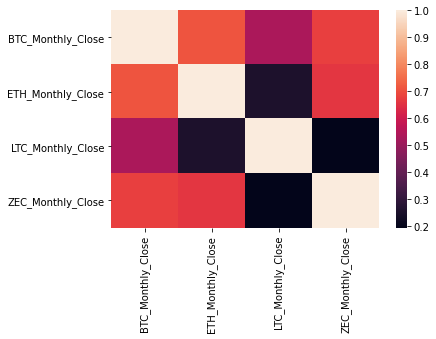

In [31]:
# Display Correlation Heatmap With Seaborn

"""
NEW CELL to check monthly returns are displayed with pct_change already applied
- Take dataframe of daily returns from step 3 (pct_change drop na already applied)

NEW CELL to check correlation dataframe
- correlation = monthly_returns_dataframe.corr()

NEW CELL to display heatmap
- sns.heatmap(correlation)


"""
correlation = final_2016_df.corr()
sns.heatmap(correlation)